# Step 1: Deciding (not) to Segment

**McDonald's can take the position that it caters to the entire market and that there is no need to understand systematic differences across market segments. Alternatively, McDonald's can take the position that, despite their market power, there is value in investigating systematic heterogeneity among consumers and harvest these differences using a differentiated marketing strategy.**

# Step 2: Specifying the Ideal Target Segment

**The target segment or target segments must be homogeneous (meaning that segment members are similar to one another in a key characteristic), distinct (meaning that members of the segments differ substantially from members of other segments in a key characteristic), large enough to justify the development and implementation of a customised marketing mix, matching the strengths of McDonald's (meaning, for example, that they must be open to eating at fast food restaurants rather than rejecting them outright), identifiable (meaning that there must be some way of spotting them among other consumers) and, finally, reachable (meaning that channels of communication and distribution need to exist which make it possible to aim at members of the target segment specifically).
The obvious choice would be a segment that has a positive perception of McDonald's, frequently eats out and likes fast food.**

# Step 3: Collecting Data

**The data set contains responses from 1453 adult Australian consumers relating to their perceptions of McDonald's with respect to the following attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING. For each of those attributes, respondents provided either a YES response (indicating that they feel McDonald's possesses this attribute), or a NO response (indicating that McDonald's does not possess this attribute).
In addition, respondents indicated their AGE and GENDER.**

# Step 4: Exploring Data

**First we explore the key characteristics of the data set by loading the data set and inspecting basic features such as the variable names, the sample size, and the first five rows of the data:**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
url="https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv"
mcdonalds=pd.read_csv(url)

In [6]:
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [7]:
print(mcdonalds.shape)

(1453, 15)


In [8]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


**As we can see from the output, the first respondent believes that McDonald's is not yummy, convenient, not spicy, fattening, not greasy, fast, cheap, not tasty, expensive, not healthy and not disgusting. This same respondent does not like McDonald's (rating of -3), is 61 years old, eats at McDonald's every three months and is female.
This quick glance at the data shows that the segmentation variables (perception of McDonald's) are verbal, not numeric. This means that they are coded using the words YES and NO. To get numbers, we store the segmentation variables in a separate matrix, and convert them from verbal YES/NO to numeric binary.
We check that we transformed the data correctly by inspecting the average value of each transformed segmentation variable.**

In [29]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    mcdonalds[x]=LabelEncoder().fit_transform(mcdonalds[x])
    return mcdonalds
cat=mcdonalds.columns[0:11]
for i in cat:
    labelling(i)
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [30]:
mcdonalds_eleven=mcdonalds.loc[:,cat]
mcdonalds_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [31]:
round(mcdonalds_eleven.mean(),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [32]:
MD_x=mcdonalds_eleven.values
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

**The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald's as YUMMY, 91% believe that eating at McDonald's is CONVENIENT, but only 9% think that McDonald's food is SPICY.
Another way of exploring data initially is to compute a pricipal components analysis, and create a perceptual map. A perceptual map offers initial insights into how attributes are rated by respondents and, importantly, which attributes tend to be rated in the same way. Here, we calculate principal components because we use the resulting components to rotate and project the data for the perceptual map. We use unstandardised data because our segmentation variables are all binary.**

In [33]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca_data=preprocessing.scale(MD_x)
pca=PCA(n_components=11)
pc=pca.fit_transform(MD_x)
names=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
MD_pca=pd.DataFrame(data=pc,columns=names)
MD_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [38]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [39]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [42]:
loadings=pca.components_
num_pc=pca.n_features_
pc_list=["PC"+str(i) for i in list(range(1,num_pc+1))]
loadings_df=pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df['variable']=mcdonalds_eleven.columns.values
loadings_df=loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


**The loadings indicate how the original variables are combined to form principal components. In our example, the two segmentation variables with the highest loadings (in absolute terms) for principal component 2 are CHEAP and EXPENSIVE, indicating that this principal component captures the price dimension.**

  Created wheel for bioinfokit: filename=bioinfokit-2.0.9-py3-none-any.whl size=57907 sha256=2fbed3ae09b7cf90c24b21440effede4ae723e74c108afcfea497f46b3256910
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\90\29\65\1660df46b304f44d07613cb3e6d739f7e9a45d1e596a8e3dfc
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=aa48ef54d90689d4868d4013b99ea7f16b68d27aaf35f2b0f30bf2e58f3fc71f
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\6b\1d\79\4326d5f3a7d86fb9900e5564e7a0f98b552da5103ca762f24f
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32154 sha256=e45bc97f4a39bbc7d9ecb008ab0446ab7c16ef970ec37ac5d2c020d0e6a77c69
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\32\41\5f\d0f29cd092d042d8e8a87d7bbe42193166aa555ff38b377343
Successfully built bioinfokit adjustText matplotlib-venn


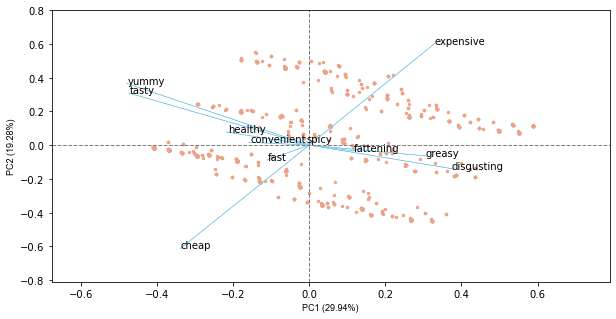

In [46]:
!pip install bioinfokit
from bioinfokit.visuz import cluster
pca_scores=PCA().fit_transform(MD_x)
cluster.biplot(cscore=pca_scores,loadings=loadings,labels=mcdonalds.columns.values,var1=round(pca.explained_variance_ratio_[0]*100,2),var2=round(pca.explained_variance_ratio_[1]*100,2),show=True,dim=(10,5))

**The figure above shows the resulting perceptual map. The attributes CHEAP and EXPENSIVE play a key role in the evaluation of McDonald's, and these two attributes are assessed quite independently of the others. The remaining attributes align with what can be interpreted as positive versus negative perceptions: FATTENING, DISGUSTING and GREASY point in the same direction in the perceptual chart, indicating that respondents who view McDonald's as FATTENING, DISGUSTING are also likely to view it as GREASY. In the opposite direction are the following attributes: FAST,CONVENIENT, HEALTHY, as well as TASTY and YUMMY. The observations along the EXPENSIVE versus CHEAP axis cluster around three values: a group of consumers at the top around the arrow pointing to EXPENSIVE, a group of respondents at the bottom around the arrow pointing to CHEAP, and a group of respondents in the middle.**

# Step 5: Extracting Segments and Step 6: Profiling Segments

# Using k-Means

In [53]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0).fit(mcdonalds_eleven)
mcdonalds['cluster_num']=kmeans.labels_
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[2 0 0 ... 0 1 3]
1603.0604440558948
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [54]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

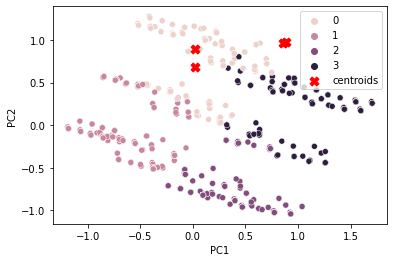

In [55]:
sns.scatterplot(data=MD_pca,x="PC1",y="PC2",hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="X",c="r",s=80,label="centroids")
plt.legend()
plt.show()

# Step 7: Describing Segments

**Descriptor variables - additional pieces of information about consumers - are critically important to gaining a good understanding of market segments. One descriptor variable available in the fast food data set is the extent to which consumers love or hate McDonald's. Using a simple mosaic plot, we can visualise the association between segment membership and loving or hating McDonald's.**

In [59]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab=pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Like'])
crosstab=crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab

Like,I hate it!-5,-4,-3,-2,-1,0,+1,+2,+3,+4,I love it!+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


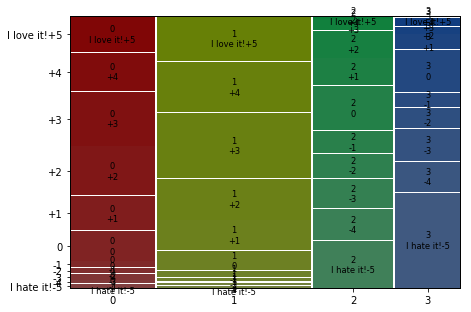

In [66]:
plt.rcParams['figure.figsize']=(7,5)
mosaic(crosstab.stack())
plt.show()

**The fast food data contains a few other basic descriptor variables, such as gender and age. Figure below shows gender distribution across segments.** 

In [67]:
crosstab_gender=pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


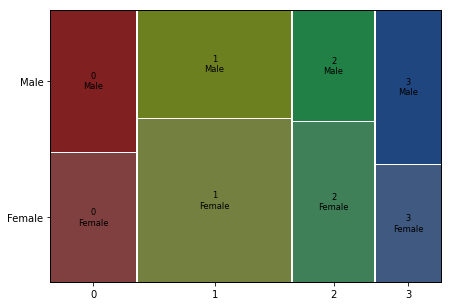

In [68]:
plt.rcParams['figure.figsize']=(7,5)
mosaic(crosstab_gender.stack())
plt.show()

**Because age is metric - rather than categorical - we use a parallel box-and-whisker plot to assess the association of age with segment membership.**

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

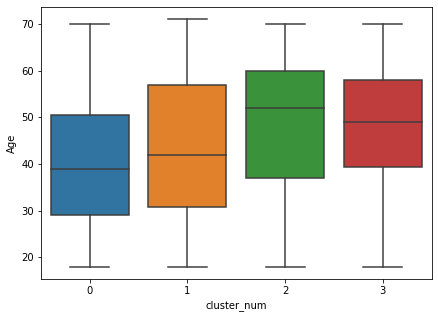

In [69]:
sns.boxplot(x="cluster_num",y="Age",data=mcdonalds)

# Step 8: Selecting (the) Target Segment(s)

**We can obtain the values required to construct the segment evaluation plot using the following commands. First we compute the mean value of the visiting frequency of McDonald's for each segment.**

In [70]:
mcdonalds['VisitFrequency']=LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit=mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit=visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [71]:
mcdonalds['Like']=LabelEncoder().fit_transform(mcdonalds['Like'])
like=mcdonalds.groupby('cluster_num')['Like'].mean()
like=like.to_frame().reset_index()
like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [72]:
mcdonalds['Gender']=LabelEncoder().fit_transform(mcdonalds['Gender'])
gender=mcdonalds.groupby('cluster_num')['Gender'].mean()
gender=gender.to_frame().reset_index()
gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [73]:
segment=gender.merge(like,on='cluster_num',how='left').merge(visit,on='cluster_num',how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


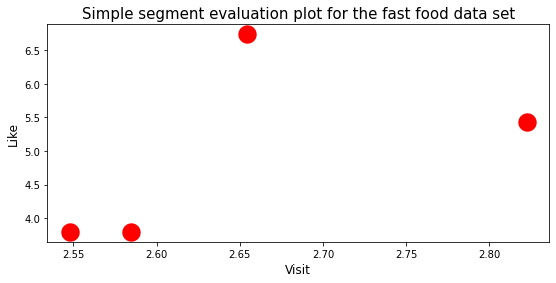

In [74]:
plt.figure(figsize=(9,4))
sns.scatterplot(x="VisitFrequency",y="Like",data=segment,s=400,color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize=15)
plt.xlabel("Visit",fontsize=12)
plt.ylabel("Like",fontsize=12)
plt.show()

**The segment evaluation plot in figure above is extremely simplified because only a small number of descriptor variables are available for the fast food data set. In figure the frequency of visiting McDonald's is plotted along the x-axis. The extent of liking or hating McDonald's is plotted along the y-axis.**

**Figure represents a simplified example of a segment evaluation plot. Market segments 3 and 4 are located in the attractive quadrant of the segment evaluation plot. Members of these two segments like McDonald's and visit it frequently. These segments need to be retained, and their needs must be satisfied in the future. Market segment 2 is located in the least attractive position. Members of this segment hate McDonald's, and rarely eat there, making them unattractive as a potential market segment.**

# Step 9: Customising the Marketing Mix

**In Step 9 the marketing mix is designed. If, for example, McDonald's managers decide to focus on segment 3 (young customers who like McDonald's, think the food is yummy and tasty, but perceive it as pretty expensive), they could choose to offer a MCSUPERBUDGET line to cater specifically to the price expectations of this segment (4 Ps: Price). The advantage of such an approach might be that members of segment 3 develop to become loyal customers who, as they start earning more money, will not care about the price any more and move to the regular McDonald's range of products. To not cannibalise the main range, the product features of the MCSUPERBUDGET range would have to be distinctly different (4 Ps: Product). Next, communication channelswould have to be identified which are heavily used by members of segment 3 to communicate the availability of the MCSUPERBUDGET line (4 Ps: Promotion). Distribution channels (4 Ps: Place) would have to be the same given that all McDonald's food is sold in McDonald's outlets.**